<a href="https://colab.research.google.com/github/medeuza/-/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D0%92%D0%B5%D0%BB%D0%BE%D1%81%D0%B8%D0%BF%D0%B5%D0%B4%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
data = pd.read_csv("bike_buyers.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


# 1). Data cleanup

Remove rows with NaN:

Deleting all "unnecessary" lines (where at least one empty value occurs)

In [ ]:
data2 = data.dropna(axis=0)
data2.info()

 Сheck that columns have the correct data type

 changing all float64(), object() to int64(), string()

In [ ]:
data3 = data2.astype({'Marital Status': 'string', 'Gender': 'string', 'Income': 'int64', 'Children': 'int64', 'Education': 'string', 'Occupation': 'string', 'Home Owner': 'string', 'Cars': 'int64', 'Commute Distance': 'string', 'Region': 'string', 'Age': 'int64', 'Purchased Bike': 'string'})
data3.info()

# 2). Descriptive statistics

Check the descriptive statistics of the dataset: mean, median, standard deviation to see the average rates of income, age, the number of cars and children of those, who buys bikes.

In [ ]:
arr = ['Income', 'Children', 'Cars', 'Age']
Mean = []
Std = []
Median = []

In [ ]:
for i in arr:
    Mean.append(data3[i].mean())
    Std.append(data3[i].std())
    Median.append(data3[i].median())

In [ ]:
table = pd.DataFrame({'Mean':Mean, 'Std':Std, 'Median':Median})
table = table.rename(index={0:'Income', 1:'Children', 2:'Cars', 3:'Age'})

I have created 'table' and assigned the Data Frame function from 'pandas' to this variable in order to print out the table with descriptive statistics.

In [ ]:
table

Еven more detailed statistics

In [ ]:
data3.describe()

# The hypothesis

It can be assumed that the general image of a bike buyer includes the following characteristics:

*   Income level - let's assume average earning
*   Аge - teenagers or middle aged people
*   Оccupation - clerical
*   Commute Distance - most likely a bike is required for distances from 5-10 miles and absence of a car

# 3). Plots

Using this array of information about bicycle buyers, I tried to recreate the portrait of a bicycle buyer, study potential customers, learn about their features in order to select the bicycles they need as accurately as possible.

The provided code uses the library "Matplotlib" to create three subplots and draw pie charts

In [ ]:
# Creating three subgraphs (graphs in a row)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

custom_colors = ['magenta', 'blueviolet', 'indigo', 'blueviolet', 'darkorchid']

# Building a pie chart for each subgraph
axs[0].pie(data3['Occupation'].value_counts().values, labels=data3['Occupation'].value_counts().index, autopct='%1.1f%%', startangle=90, colors = custom_colors)
axs[1].set_title('Cars')
axs[0].set_title('Occupation')

axs[1].pie(data3['Cars'].value_counts().values, labels=data3['Cars'].value_counts().index, autopct='%1.1f%%', startangle=90, colors = custom_colors)
axs[1].set_title('Cars')

axs[2].pie(data3['Commute Distance'].value_counts().values, labels=data3['Commute Distance'].value_counts().index, autopct='%1.1f%%', startangle=90, colors = custom_colors)
axs[2].set_title('Commute Distance')

plt.show()

To visualize the subsequent graph I used "Seaborn" an additional aid for data visualization. With it's help, I made a box diagram for the variables 'Age' and 'Commute Distance' from the data. The box diagram allows you to visually assess the main statistical characteristics, such as the median, lower and upper quartiles, minimum and maximum sample values and outliers.

In [ ]:
plt.figure(figsize=(10, 5))

# Creating a box diagram
sns.boxplot(x=data['Age'], y=data['Commute Distance'], orient="h", palette= ['magenta', 'blueviolet', 'indigo', 'blueviolet', 'magenta'])

plt.grid()
plt.show()

By the box plot above it can be stated that 10+ miles distance was commuted mostly by middle aged people (from 40 to 60 years), 5-10 miles were commuted by people aged from approximatelly 32 to 55 , being the most significant bar in the chart, while the least rates were for 0-1 miles.

In the table below I also use Matplotlib (plt.show) and Seaborne (sns.pairplot)

In [ ]:
keys = ['Cars', 'Children', 'Income', 'Gender']

# Use the palette parameter in pairplot
n = sns.pairplot(data[keys], hue='Gender', markers=["8", "*"], palette = {'Male': 'mediumblue', 'Female': 'magenta'})

plt.show()

In this graph it can be seen that, first of all, women have slightly less cars than men, both genders have similar pattern in both income and chirdren.

# 4). Detailed overview/Data transformation

For the next visualization of statistics, I need to change the data by adding new columns or converting previous columns

Add "Income per person" column using lambda function

In [ ]:
data3['PeopleNumber'] = data3.apply(lambda x: 2 + x["Children"] if x["Marital Status"] == "Married" else 1+ x["Children"], axis=1)

data3["Income per person"] = data3.apply(lambda x: x["Income"] / x["PeopleNumber"], axis=1)

In [ ]:
data3.head()

Add column "2Commute Distance" using other functions

In [ ]:
import random
def rep(x):
  if not(isinstance(x,str)):
    return x
  if "Miles" in x:
    x = x.replace("Miles", "")
  x=x.replace("+","")
  x=x.split("-")
  if len(x)==1:
    return int(x[0])
  else:
    return  random.random() + random.randint(int(x[0]), int(x[1])-1)

data3["2Commute Distance"] = data3["Commute Distance"].apply(rep)
data3["2Commute Distance"]

Now we draw a scatter plot with the help of new added columns

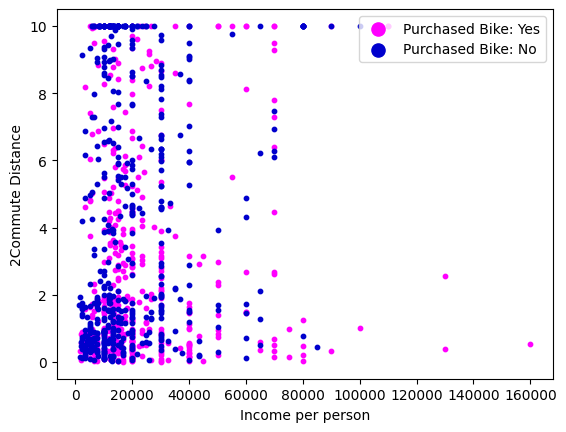

In [ ]:
# Draw a scatter plot
scatter = data3[data3['Purchased Bike'] == 'Yes'].plot.scatter(x='Income per person', y='2Commute Distance', s=10, c='magenta')
data3[data3['Purchased Bike'] == 'No'].plot.scatter(x='Income per person', y='2Commute Distance', s=10, c='mediumblue', ax=scatter)

# Add legend
plt.legend(["Purchased Bike: Yes", "Purchased Bike: No"], loc='upper right', markerscale=3)

# Show the plot
plt.show()

This scatterplot shows that people with low incomes (up to 20,000) are more interested in bicycles, while those with high incomes rarely buy bicycles (80,000+). It is also seen that those who buy bicycles buy them mainly for short distances (0-2 miles). There is a slight correlation between income and travel distance. The lower the income, the shorter the distance the consumer is interested in.

Next, I want to present a graph of the population pyramid. To do this, I prepare data with separation on male/female

In [ ]:
male = data3[data3['Gender'] == "Male"].groupby("Age").count()
male["ID"].to_numpy()
ageM = male.index.to_numpy()
ageM

female = data3[data3['Gender'] == "Female"].groupby("Age").count()
female["ID"].to_numpy()
ageF = female.index.to_numpy()
ageF

Next, I build the graph using "Matplotlib" - to draw plots, setting labels, headings, legend, net and graph display, "NumPy" - to create an array of age values and set labels on the y axis and "Pandas" - for converting data into NumPy arrays and indexing:

In [ ]:
ageM = male.index.to_numpy()
ageF = female.index.to_numpy()
male_population = male["ID"].to_numpy()
female_population = female["ID"].to_numpy()

# Invert the data of the male population to display them on the left side of the pyramid
male_population = -male_population

fig, ax = plt.subplots(figsize=(10, 8))

# Creating a population pyramid graph
ax.barh(ageM, male_population, height=0.5, label='Male', color='mediumblue')
ax.barh(ageF, female_population, height=0.5, label='Female', color='magenta')

# Adding a center line
ax.vlines(0, ymin= min(ageM[0], ageF[0]), ymax= max(ageM[-1], ageF[-1]), color='gray')

# Returning the x-axis for "male" to show positive values
ax.set_xticks([ -25, 0, 25])
ax.set_xticklabels([-25, 0, 25])

ax.set_yticks(np.arange(25, 90, 5))
ax.set_yticklabels(np.arange(25, 90, 5))

# Setting labels
ax.set_xlabel('Number of people')
ax.set_ylabel('Age')
ax.set_title('Age distribution')

# In the upper right corner "Males/Females"
ax.legend(loc='upper right')

# Creating a net (сетка?)
ax.grid(True, linestyle='--', which='both', color='gray', alpha=0.7)

plt.show()

The bar chart above depicts the distribution of people by their age and gender and it is clearly seen that most of those interested in purchasing bikes are in their forties and least interested are in late sixties.

# In conclusion

Overall, the target audience are people from 40 to 50 years old. Both women and men, there is not much difference. It confirms my initial hypothesis
Furthermore, This group includes people with proffecional or skilled manual occupations who have 2 or more cars per family, which does not confirm the preliminary hypothesis.
The income of a potential buyer turned out to be low, up to 20,000. Which also turned out to be unexpected when analyzing the data.
With this level of income, a bicycle is needed for short distances, up to 2 miles.

Based on this data, you can make a list of suitable bicycle models. Most likely, it will be a bike for short distances, budget-friendly, without special external characteristics, gender-oriented.
This analysis will help improve product promotion channels and create an individual offer for the bicycle market segment.